In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("Diwali Sales Data.csv",encoding = 'unicode_escape')
df
# to avoid error use either "latin1" or "unicode_escape"

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [3]:
df.drop(["Status","unnamed1"],axis = 1,inplace = True)

In [4]:
df.dropna(inplace = True)

In [5]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [6]:
df["Amount"] = df["Amount"].astype("int")

# Exploratory Data Analysis

## Gender

In [7]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

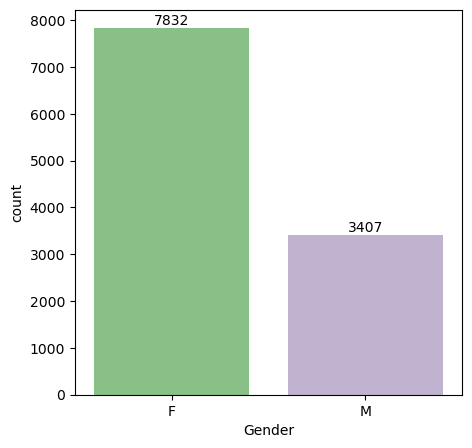

In [8]:
plt.figure(figsize = (5,5))
x = sns.countplot(x = 'Gender',data = df,palette = "Accent")
for bars in x.containers:
    x.bar_label(bars)

# x.bar_label(x.containers[0])
                  

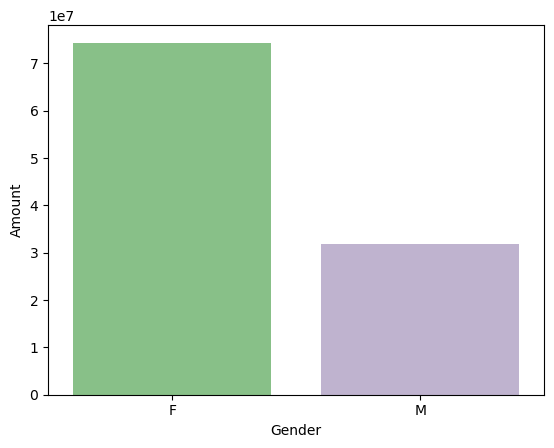

In [9]:
sales_gen = df.groupby(['Gender'], as_index = False)["Amount"].sum().sort_values(by = "Amount",ascending = False)
sns.barplot(x = "Gender", y = "Amount", data = sales_gen,palette = "Accent")
plt.show()

From above graph we have analysed that the most of the buyers are Female and they have spend much money as compared to man

## Age

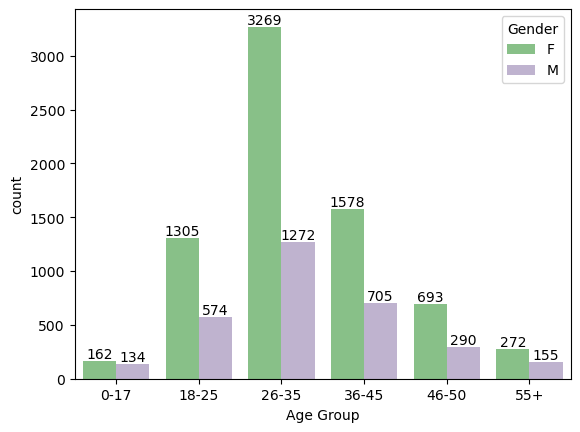

In [10]:
order = ['0-17','18-25','26-35','36-45','46-50','55+']
a = sns.countplot(data = df, x = "Age Group", hue = 'Gender',palette = "Accent",order = order)
# a.bar_label(a.containers[0])
for bars in a.containers:
    a.bar_label(bars)
plt.show()


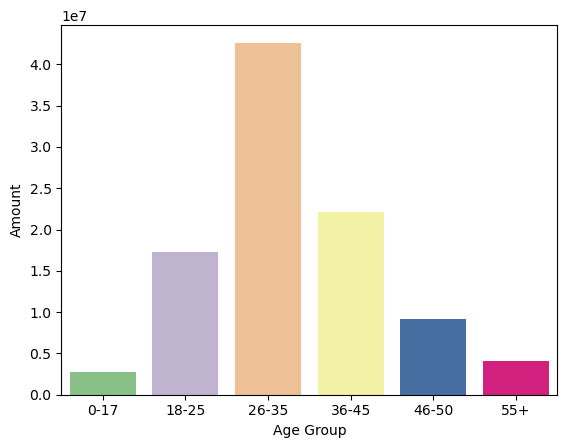

In [11]:
order = ['0-17','18-25','26-35','36-45','46-50','55+']

sales_age = df.groupby(['Age Group'], as_index = False)["Amount"].sum().sort_values(by = "Amount")
a = sns.barplot(x = "Age Group", y = "Amount", data = sales_age,palette = "Accent",order = order)
plt.show()

From the above Graph we have analysed that most of the buyers are of the age group 26-35 and are female 

## State

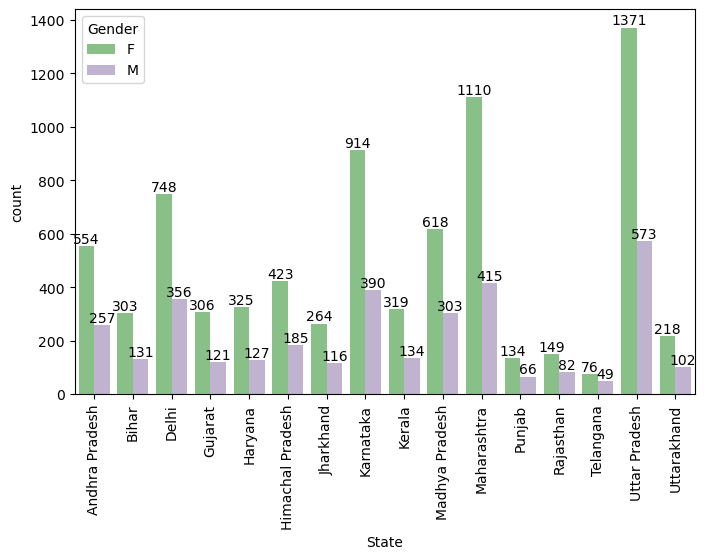

In [12]:
plt.figure(figsize=(8, 5))
df_sorted = df.sort_values(by='State')
a = sns.countplot(data = df_sorted, x = "State", hue = 'Gender',palette = "Accent")
a.set_xticklabels(a.get_xticklabels(),rotation =90)
for bars in a.containers:
    a.bar_label(bars)
plt.show()

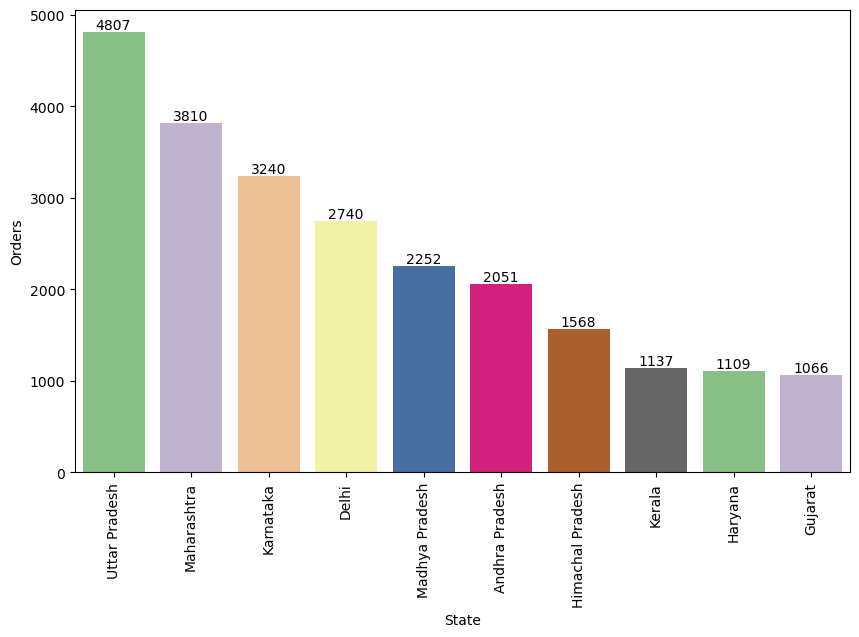

In [13]:
plt.figure(figsize=(10, 6))
# orders = ["Andhra\xa0Pradesh","Bihar","Delhi","Gujarat","Haryana","Himachal Pradesh","Jharkhand","Karnataka","Kerala",
#           "Madhya Pradesh","Maharashtra","Punjab","Rajasthan","Telangana","Uttar Pradesh","Uttarakhand"]
sales_state = df.groupby(['State'], as_index = False)["Orders"].sum().sort_values(by = ["Orders"],ascending = False).head(10)
a = sns.barplot(x = "State", y = "Orders", data = sales_state,palette = "Accent")
a.set_xticklabels(a.get_xticklabels(),rotation =90)
for bars in a.containers:
    a.bar_label(bars)
plt.show()

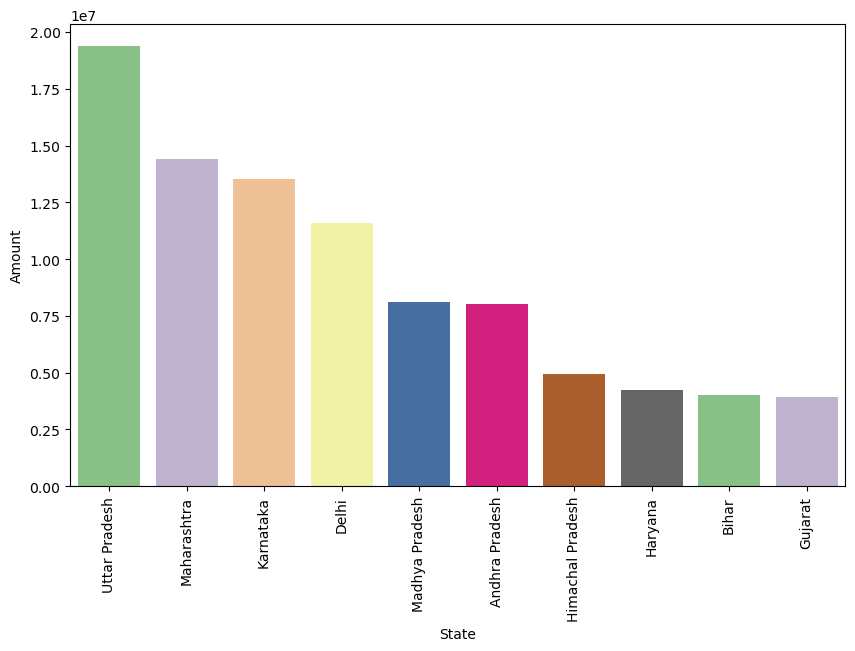

In [14]:
plt.figure(figsize=(10, 6))
# orders = ["Andhra\xa0Pradesh","Bihar","Delhi","Gujarat","Haryana","Himachal Pradesh","Jharkhand","Karnataka","Kerala",
#           "Madhya Pradesh","Maharashtra","Punjab","Rajasthan","Telangana","Uttar Pradesh","Uttarakhand"]
sales_states = df.groupby(['State'], as_index = False)["Amount"].sum().sort_values(by = ["Amount"],ascending = False).head(10)
a = sns.barplot(x = "State", y = "Amount", data = sales_states,palette = "Accent")
a.set_xticklabels(a.get_xticklabels(),rotation =90)
plt.show()

From the above Graph we have analysed that Uttar Pradesh , Maharashtra and Karnataka have the highest orders

## Marital Status

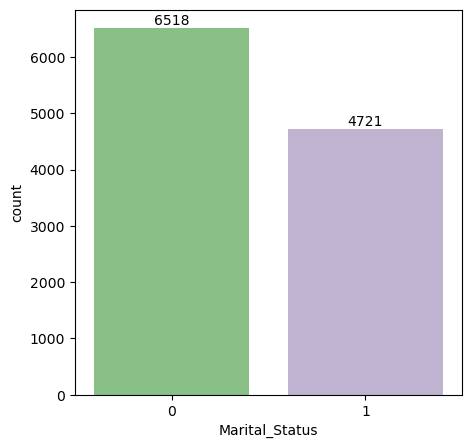

In [15]:
plt.figure(figsize=(5, 5))
x = sns.countplot(data = df, x = "Marital_Status",palette = "Accent")

for bars in x.containers:
    x.bar_label(bars)

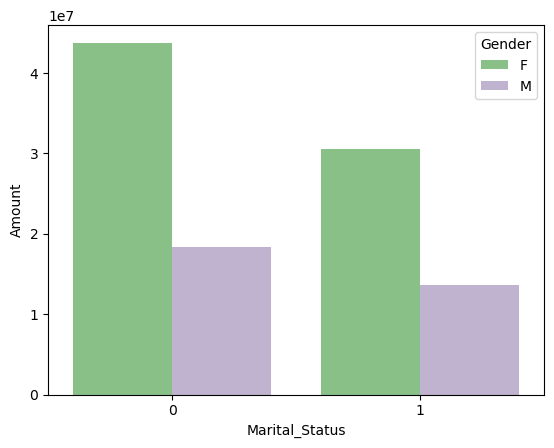

In [16]:
sales_states = df.groupby(['Marital_Status',"Gender"], as_index = False)["Amount"].sum().sort_values(by = ["Amount"],ascending = False)
a = sns.barplot(x = "Marital_Status", y = "Amount",hue = "Gender", data = sales_states,palette = "Accent")

plt.show()

From the above graph we have analysed that most of the buyers are married women

## Occupation

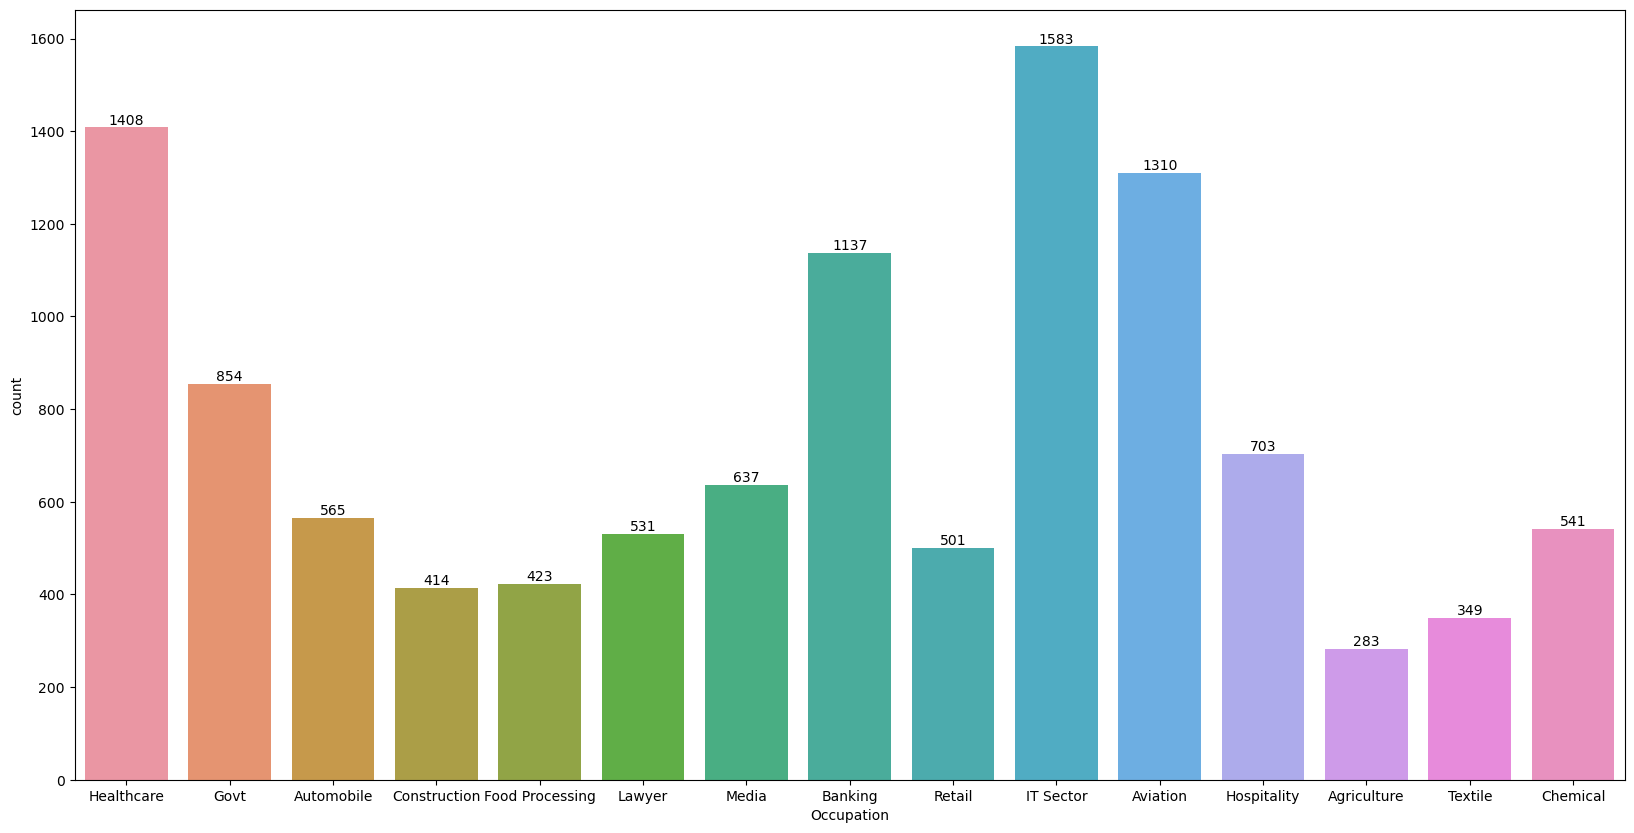

In [17]:
plt.figure(figsize=(20, 10))
x = sns.countplot(data = df, x = "Occupation")

for bars in x.containers:
    x.bar_label(bars)
    
# x.set_xticklabels(x.get_xticklabels(),rotation = 90)
plt.show()

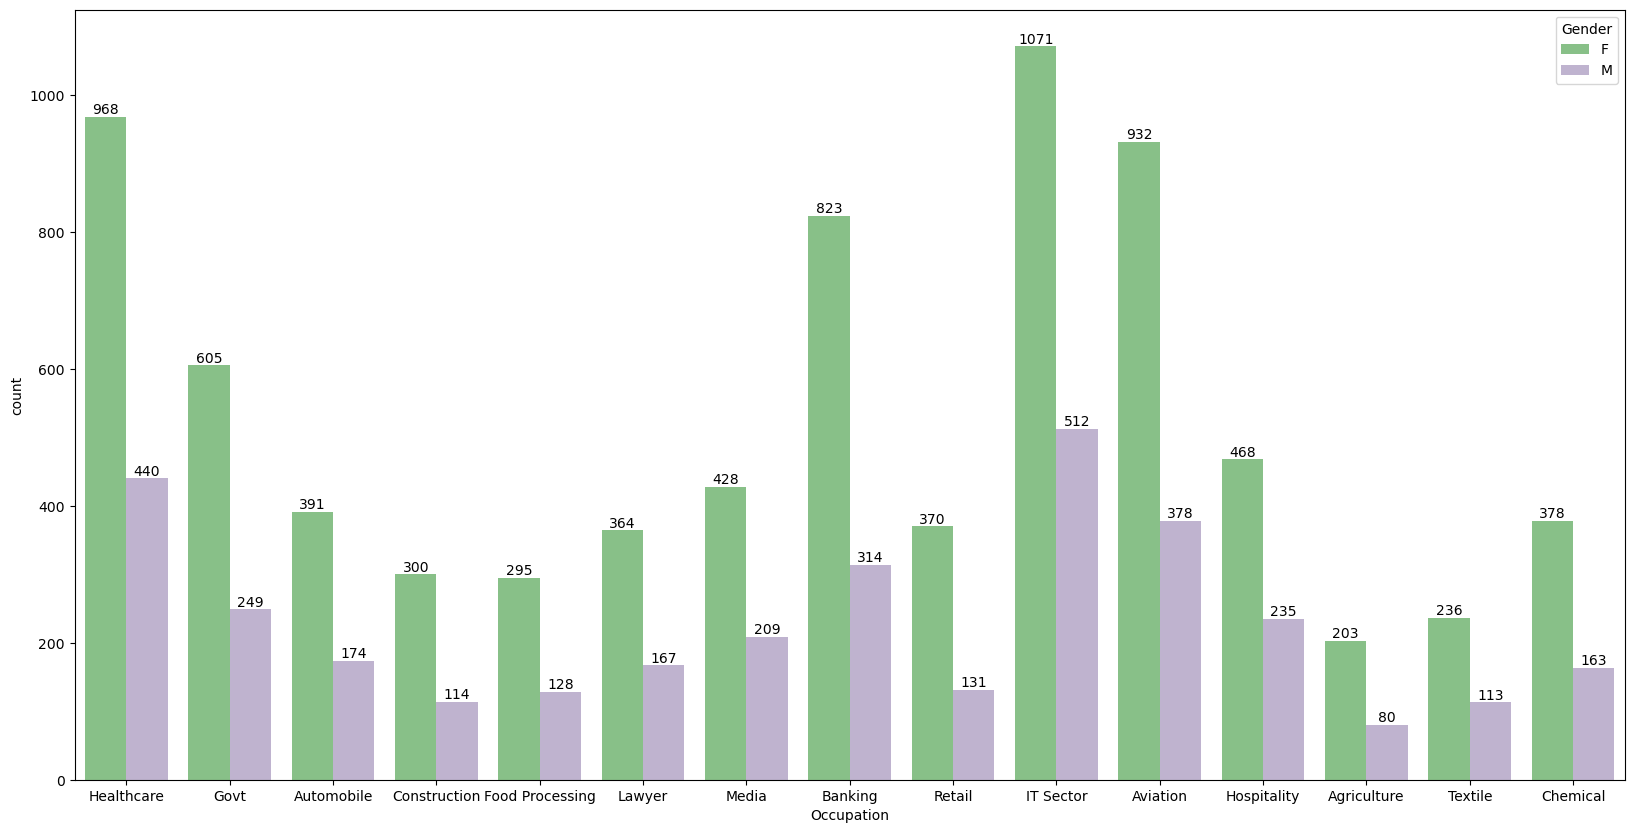

In [18]:
plt.figure(figsize=(20, 10))
x = sns.countplot(data = df, x = "Occupation",hue = "Gender",palette = "Accent" )

for bars in x.containers:
    x.bar_label(bars)
    
# x.set_xticklabels(x.get_xticklabels(),rotation = 90)
plt.show()

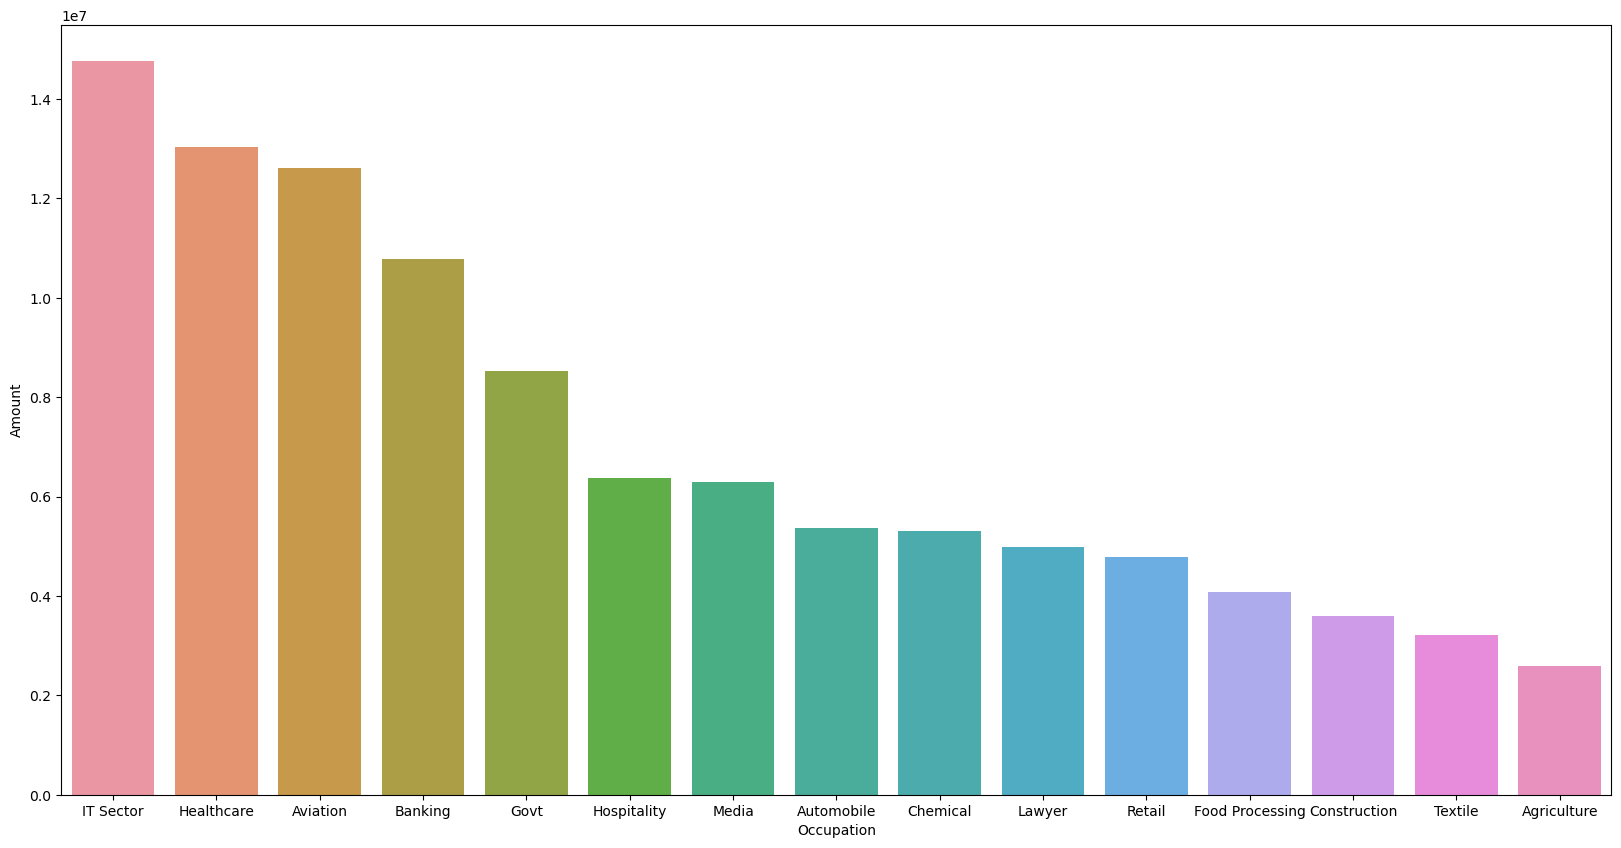

In [19]:
plt.figure(figsize=(20, 10))
sales_occupation = df.groupby(['Occupation'], as_index = False)["Amount"].sum().sort_values(by = ["Amount"],ascending = False)
a = sns.barplot(x = "Occupation", y = "Amount", data = sales_occupation)
# a.set_xticklabels(a.get_xticklabels(),rotation =90)
plt.show()

From the above graph we have analysed that the highest purchased are done by the people who are in It sector, Healthcare ,Aviation respectively

## Product Category

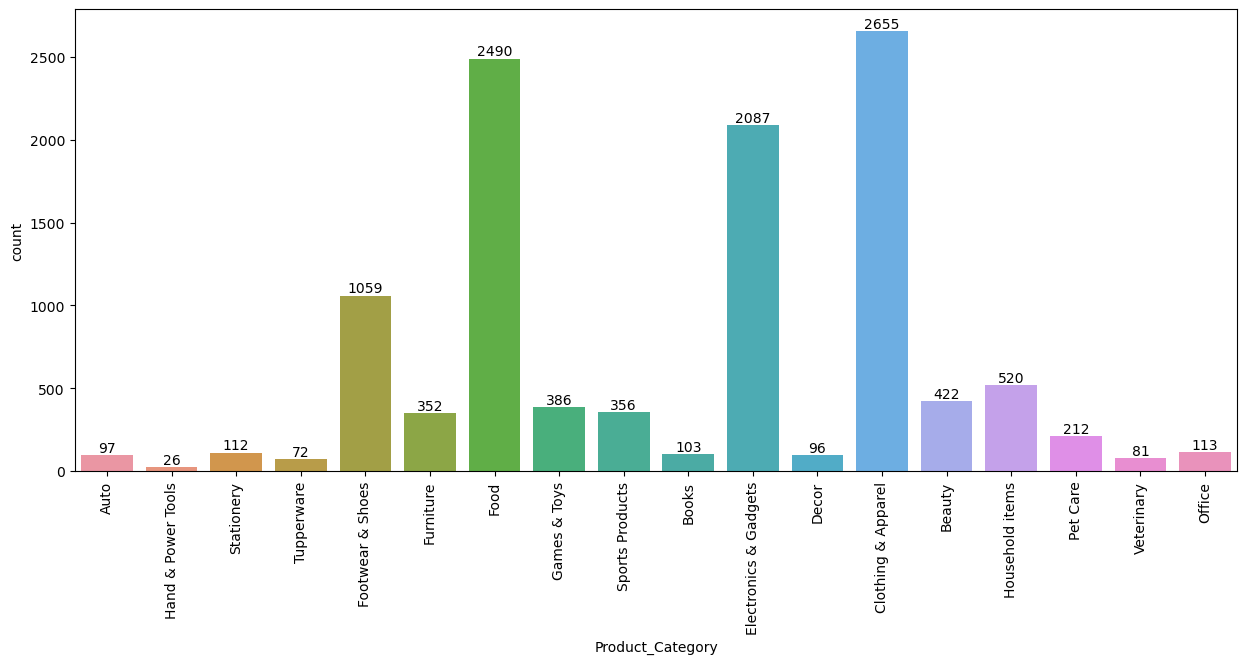

In [20]:
plt.figure(figsize=(15,6))
x = sns.countplot(data = df, x = "Product_Category")

for bars in x.containers:
    x.bar_label(bars)
    
x.set_xticklabels(x.get_xticklabels(),rotation = 90)
plt.show()

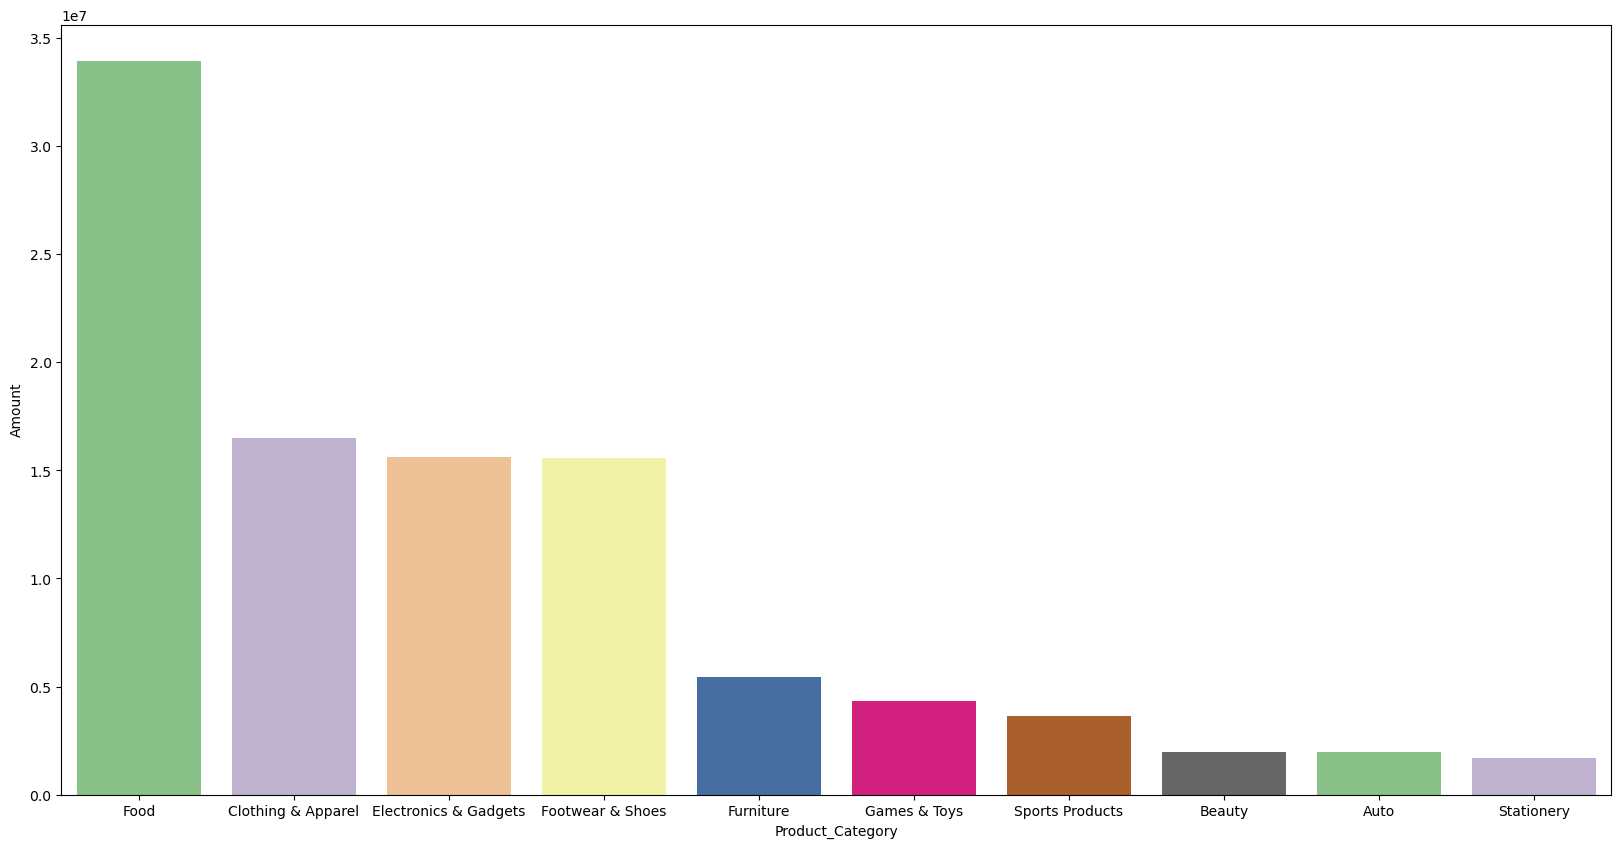

In [21]:
plt.figure(figsize=(20, 10))
sales_product = df.groupby(['Product_Category'], as_index = False)["Amount"].sum().sort_values(by = ["Amount"],ascending = False).head(10)
a = sns.barplot(x = "Product_Category", y = "Amount", data = sales_product,palette = "Accent")
# a.set_xticklabels(a.get_xticklabels(),rotation =90)
plt.show()

From above graphs we can see that most of the sold products are from Food , Clothing & Apparel and Electronics&Gadgets respectively

## Product ID

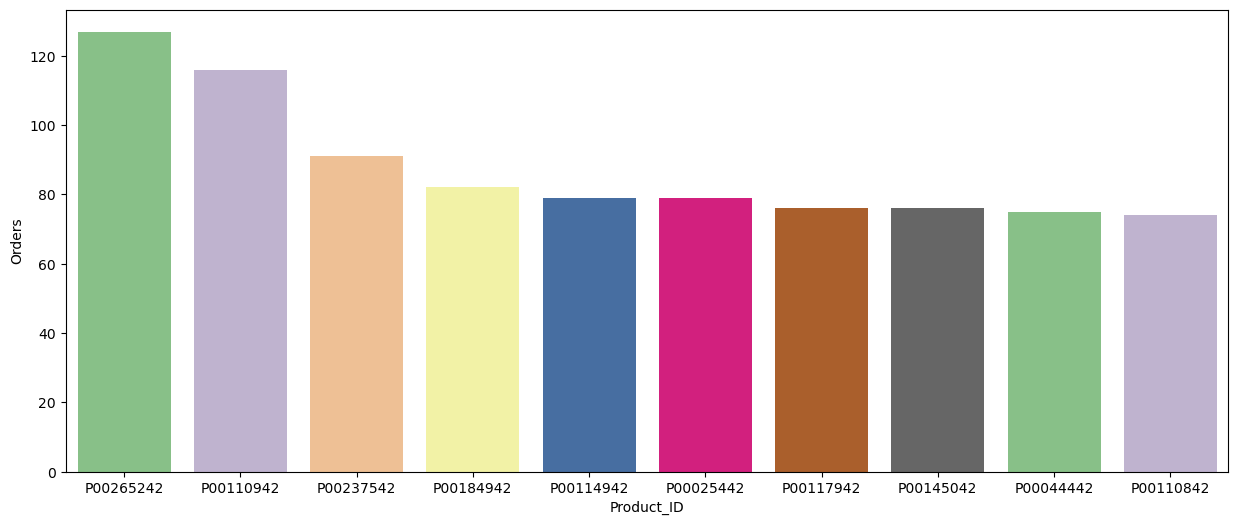

In [22]:
plt.figure(figsize=(15, 6))
sales_product = df.groupby(['Product_ID'], as_index = False)["Orders"].sum().sort_values(by = ["Orders"],ascending = False).head(10)
a = sns.barplot(x = "Product_ID", y = "Orders", data = sales_product,palette = "Accent")
#a.set_xticklabels(a.get_xticklabels(),rotation =90)
plt.show()

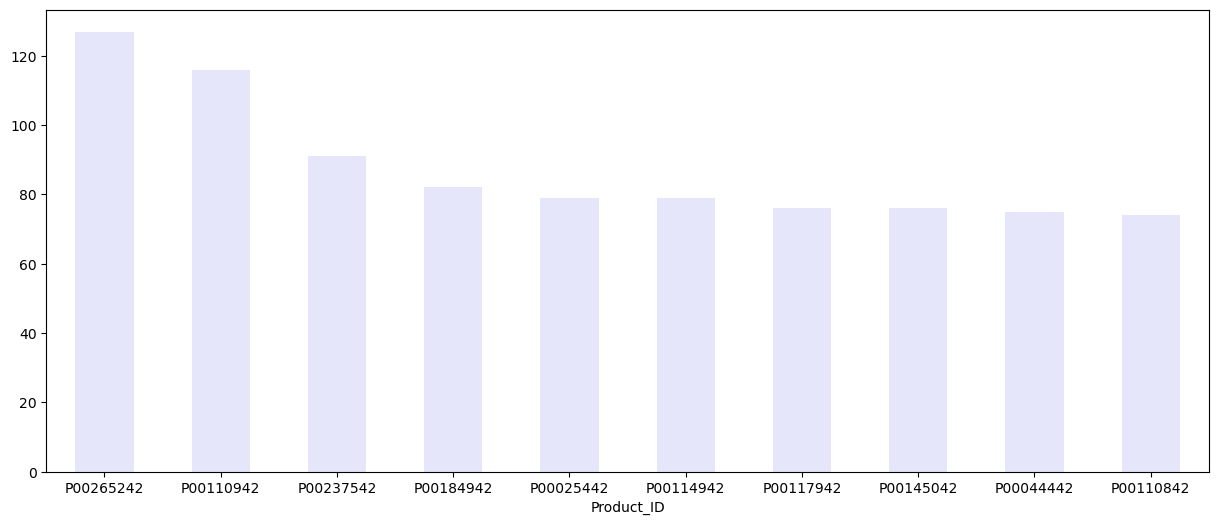

In [23]:
plt.figure(figsize=(15, 6))
a = df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind="bar",color = "lavender")
# a = sns.barplot(x = "Product_ID", y = "Orders", data = sales_product,palette = "Accent")
a.set_xticklabels(a.get_xticklabels(),rotation = 0)
plt.show()

# Conclusion:

Married women in the age group of 26-35 yrs from UP, Maharastra and Karnatka working in IT, Healthcare and Aviation are more likely to buy products from Food Clothing and Electronics category